In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

from datetime import datetime
from sklearn.model_selection import train_test_split

from matplotlib import pyplot
import matplotlib.pyplot as plt

In [3]:
# best submit data

path = '/content/drive/MyDrive/Colab Notebooks/DACON CUP/submit_data'
path2 = "/content/drive/MyDrive/Colab Notebooks/DACONCUP 주희/submit"


# 최종 stacking 모델
best = pd.read_csv(path + '/best공휴일+xgb_new.csv', encoding = 'euc-kr')
best.set_index('DateTime', inplace = True)
best.index = pd.to_datetime(best.index)


#worst = pd.read_csv(path + '/submission0112_new.csv', encoding = 'euc-kr')
worst = pd.read_csv(path + '/submission0111_1.csv', encoding = 'euc-kr')
worst.set_index('DateTime', inplace = True)
worst.index = pd.to_datetime(worst.index)



# xgb 

xgb_sub_best = pd.read_csv(path + '/xgb_distribute_new.csv', encoding = 'euc-kr')
xgb_sub_best.set_index('DateTime', inplace = True)
xgb_sub_best.index = pd.to_datetime(best.index)


xgb_sub_worst = pd.read_csv(path + '/xgb_최고기록_chan.csv', encoding = 'euc-kr')
xgb_sub_worst.set_index('DateTime', inplace = True)
xgb_sub_worst.index = pd.to_datetime(best.index)


In [4]:
# lstm_sub_best = pd.read_csv(path + '/공휴일 feature.csv', encoding = 'euc-kr')
lstm_sub_best = pd.read_csv(path2 + '/best+holiday+1.1.csv', encoding = 'euc-kr')
lstm_sub_best.set_index('DateTime', inplace = True)
lstm_sub_best.index = pd.to_datetime(lstm_sub_best.index)

lstm_sub_worst = pd.read_csv(path + "/seed40_add 날짜feature.csv", encoding = 'euc-kr')
lstm_sub_worst.set_index('DateTime', inplace = True)
lstm_sub_worst.index = pd.to_datetime(best.index)

In [5]:
#submission.head()

NameError: ignored

#### lstm 그래프 비교

In [ ]:
# plot expected vs preducted


plt.figure(figsize = (20,7))
pyplot.plot(lstm_sub_best['사용자'], label='best')
#pyplot.plot(submission['사용자'], label='Predicted')
pyplot.plot(lstm_sub_worst['사용자'], label = 'worst')
pyplot.legend()
pyplot.show()

In [ ]:

plt.figure(figsize = (20,7))
pyplot.plot(lstm_sub_best['신규방문자'], label='best')
#pyplot.plot(submission['신규방문자'], label='Predicted')
pyplot.plot(lstm_sub_worst['신규방문자'], label = 'worst')
pyplot.legend()
pyplot.show()

In [ ]:

plt.figure(figsize = (20,7))
pyplot.plot(lstm_sub_best['세션'], label='best')
#pyplot.plot(submission['세션'], label='Predicted')
pyplot.plot(lstm_sub_worst['세션'], label = 'worst')
pyplot.legend()
pyplot.show()

In [ ]:

plt.figure(figsize = (20,7))
pyplot.plot(lstm_sub_best['페이지뷰'], label='best')
#pyplot.plot(submission['페이지뷰'], label='Predicted')
pyplot.plot(lstm_sub_worst['페이지뷰'], label = 'worst')
pyplot.legend()
pyplot.show()

#### XGB 그래프 비교

In [ ]:
# plot expected vs preducted


plt.figure(figsize = (20,7))
pyplot.plot(xgb_sub_best['사용자'], label='best')
pyplot.plot(lstm_sub_best['사용자'], label='Predicted')
#pyplot.plot(xgb_sub_worst['사용자'], label = 'worst')
pyplot.legend()
pyplot.show()

In [ ]:

plt.figure(figsize = (20,7))
pyplot.plot(xgb_sub_best['신규방문자'], label='best')
#pyplot.plot(submission['신규방문자'], label='Predicted')
pyplot.plot(xgb_sub_worst['신규방문자'], label = 'worst')
pyplot.legend()
pyplot.show()

In [ ]:

plt.figure(figsize = (20,7))
pyplot.plot(xgb_sub_best['세션'], label='best')
#pyplot.plot(submission['세션'], label='Predicted')
pyplot.plot(xgb_sub_worst['세션'], label = 'worst')
pyplot.legend()
pyplot.show()

In [ ]:

plt.figure(figsize = (20,7))
pyplot.plot(xgb_sub_best['페이지뷰'], label='best')
#pyplot.plot(submission['페이지뷰'], label='Predicted')
pyplot.plot(xgb_sub_worst['페이지뷰'], label = 'worst')
pyplot.legend()
pyplot.show()

#### mean sub_stacking

In [6]:
mean_sub = ((xgb_sub_best+lstm_sub_best)/2).round().astype(int)
mean_sub.head()

,사용자,세션,신규방문자,페이지뷰
DateTime,,,,
2020-11-09,3575,3540,866,91530
2020-11-10,4296,4502,1222,117490
2020-11-11,3751,3724,894,93802
2020-11-12,4109,3786,919,114406
2020-11-13,3382,3220,783,83992


In [ ]:
#mean_sub.to_csv('공휴일all-0.1 + xgb_new.csv', encoding = 'euc_kr',index=True)

In [ ]:
#merge_worst = pd.read_csv(path + '/submission0112_2.csv', encoding = 'euc-kr')
#merge_worst.set_index('DateTime', inplace = True)
#merge_worst.index = pd.to_datetime(best.index)

#### LGBM 스태킹

In [ ]:
import lightgbm as lgb
from lightgbm import LGBMRegressor

from sklearn.model_selection import GridSearchCV

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/DACON CUP'

train = pd.read_csv(path + '/open_data/train.csv', encoding = 'euc-kr')
train.head()

,DateTime,사용자,세션,신규방문자,페이지뷰
0,2018-09-09 00:00:00,19,19,8,206
1,2018-09-09 01:00:00,20,19,9,259
2,2018-09-09 02:00:00,12,9,1,48
3,2018-09-09 03:00:00,10,10,2,102
4,2018-09-09 04:00:00,6,5,3,18


In [ ]:
# x_test: train의 -61행을사용

x_test = train.iloc[-61:,1:].values
# x_test


In [ ]:
# train_y : best모델의 값을 사용

train_y = np.array(best)
train_y = np.transpose(train_y)
train_y.shape

(4, 61)

In [ ]:
train_y[0]

array([3574, 4272, 3738, 4136, 3405, 2490, 2312, 4272, 3608, 3930, 3486,
       3146, 2314, 2233, 3108, 4044, 4028, 4006, 3292, 2448, 2304, 3563,
       3296, 3932, 3834, 3654, 2282, 2192, 3128, 3512, 3694, 3572, 4138,
       2066, 2008, 3617, 3260, 3430, 3765, 3961, 2114, 2089, 3835, 3628,
       3146, 3518, 2570, 1952, 1890, 3457, 3178, 2862, 2190, 1753, 1684,
       1779, 2986, 3042, 2880, 2757, 2884])

In [ ]:
# test셋으로 예측한 값

user_test_pred = np.array([lstm_sub_best['사용자'], xgb_sub_best['사용자']])
user_test_pred = np.transpose(user_test_pred)
user_test_pred.shape

session_test_pred = np.array([lstm_sub_best['세션'], xgb_sub_best['세션']])
session_test_pred = np.transpose(session_test_pred)
session_test_pred.shape

new_test_pred = np.array([lstm_sub_best['신규방문자'], xgb_sub_best['신규방문자']])
new_test_pred = np.transpose(new_test_pred)
new_test_pred.shape

page_test_pred = np.array([lstm_sub_best['페이지뷰'], xgb_sub_best['페이지뷰']])
page_test_pred = np.transpose(page_test_pred)
page_test_pred.shape

(61, 2)

In [ ]:
test_lgbm_reg=LGBMRegressor(random_state=40)
test_lgbm_reg.fit(user_test_pred, train_y[0])   #train_all_pred

# joblib.dump(test_lgbm_clf,'train_lgbm_stacking_clf.pkl')

user_lgbm_pred = test_lgbm_reg.predict(x_test[0]) #  max_depth=2
user_lgbm_pred

ValueError: ignored

In [ ]:
test_lgbm_reg=LGBMRegressor(random_state=40)
test_lgbm_reg.fit(session_test_pred, train_y[1])   #train_all_pred

# joblib.dump(test_lgbm_reg,'train_lgbm_stacking_clf.pkl')

session_lgbm_pred = test_lgbm_reg.predict(session_test_pred) #  max_depth=2
session_lgbm_pred


array([3639.79251988, 3828.0541495 , 3828.0541495 , 3828.0541495 ,
       3286.87045664, 2321.23676049, 2108.69806999, 3726.5722354 ,
       3519.91975883, 3639.79251988, 2938.83557095, 2868.05512596,
       2108.69806999, 2108.69806999, 3519.91975883, 3726.5722354 ,
       3828.0541495 , 3828.0541495 , 3323.58082642, 2322.70531407,
       2108.69806999, 3311.36025357, 2871.65847481, 3828.0541495 ,
       3631.71521709, 3631.71521709, 2108.69806999, 2108.69806999,
       3200.09074112, 3631.71521709, 3560.9347721 , 3388.35237074,
       3828.0541495 , 2108.69806999, 2108.69806999, 3388.35237074,
       2711.42975479, 3295.11758812, 3726.5722354 , 3726.5722354 ,
       2108.69806999, 2108.69806999, 3631.71521709, 3560.9347721 ,
       3081.11034404, 3081.11034404, 2481.65847972, 2107.42251562,
       2107.42251562, 3081.11034404, 2912.63449253, 3081.11034404,
       2108.69806999, 2108.69806999, 2108.69806999, 2108.69806999,
       2922.63581285, 2922.63581285, 2922.63581285, 2922.63581

In [ ]:
test_lgbm_reg=LGBMRegressor(random_state=40)
test_lgbm_reg.fit(new_test_pred, train_y[2])   #train_all_pred

# joblib.dump(test_lgbm_reg,'train_lgbm_stacking_clf.pkl')

new_lgbm_pred = test_lgbm_reg.predict(new_test_pred) #  max_depth=2
new_lgbm_pred



array([845.56469856, 947.64266698, 947.64266698, 938.08489117,
       845.56469856, 480.73120869, 415.49141663, 908.06857922,
       845.56469856, 947.64266698, 947.64266698, 881.91632267,
       415.49141663, 415.49141663, 947.64266698, 947.64266698,
       947.64266698, 947.64266698, 947.64266698, 480.73120869,
       415.49141663, 881.91632267, 708.27768402, 947.64266698,
       881.91632267, 881.91632267, 415.49141663, 415.49141663,
       717.83545983, 799.4164268 , 857.90362511, 881.91632267,
       865.14277111, 415.49141663, 415.49141663, 775.40372924,
       747.270187  , 849.34815543, 908.06857922, 938.08489117,
       415.49141663, 415.49141663, 947.64266698, 845.56469856,
       708.27768402, 711.01359542, 516.98780027, 415.49141663,
       415.49141663, 717.83545983, 717.83545983, 645.77380336,
       549.55596751, 415.49141663, 415.49141663, 415.49141663,
       655.56631505, 615.28231183, 549.55596751, 589.83997074,
       565.82727318])

In [ ]:
test_lgbm_reg=LGBMRegressor(random_state=40)
test_lgbm_reg.fit(page_test_pred, train_y[3])   #train_all_pred

# joblib.dump(test_lgbm_clf,'train_lgbm_stacking_clf.pkl')

page_lgbm_pred = test_lgbm_reg.predict(page_test_pred) #  max_depth=2
page_lgbm_pred


array([93222.34675424, 99462.95368218, 99462.95368218, 99462.95368218,
       83573.11479254, 52887.3470977 , 45867.35492448, 99462.95368218,
       99462.95368218, 98926.91428696, 92465.74595129, 92465.74595129,
       45867.35492448, 45867.35492448, 94564.20950305, 98926.91428696,
       99462.95368218, 99462.95368218, 92465.74595129, 67183.24379793,
       49695.88947066, 99462.95368218, 81975.59935491, 92465.74595129,
       79665.75161422, 70750.11069593, 49058.81255152, 45867.35492448,
       66921.57614975, 74986.32231386, 74986.32231386, 66921.57614975,
       95555.59050386, 45867.35492448, 45867.35492448, 88323.60257511,
       95555.59050386, 86225.13902336, 96302.21118731, 98926.91428696,
       51293.40490829, 45867.35492448, 99462.95368218, 92465.74595129,
       78147.06480873, 78147.06480873, 67183.24379793, 45867.35492448,
       49058.81255152, 81975.59935491, 78147.06480873, 78147.06480873,
       45867.35492448, 45867.35492448, 45867.35492448, 49695.88947066,
      

## submit

In [ ]:
path3 = '/content/drive/MyDrive/Colab Notebooks/DACON CUP'

submission =  pd.read_csv(path3 + '/open_data/submission.csv', encoding = 'euc-kr')
submission.shape

(61, 5)

In [ ]:
lgbm_st = submission.copy()

for i in range(len(submission)):
  lgbm_st['사용자'][i] = round(user_lgbm_pred[i])
  lgbm_st['세션'][i] = round(session_lgbm_pred[i])
  lgbm_st['신규방문자'][i] = round(new_lgbm_pred[i])
  lgbm_st['페이지뷰'][i] = round(page_lgbm_pred[i])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: Se

In [ ]:
lgbm_st.head()

,DateTime,사용자,세션,신규방문자,페이지뷰
0,2020-11-09,3609,3640,846,93222
1,2020-11-10,3824,3828,948,99463
2,2020-11-11,4010,3828,948,99463
3,2020-11-12,4010,3828,938,99463
4,2020-11-13,3493,3287,846,83573


In [ ]:

lgbm_st.to_csv('lgbm stacking.csv', index = False, encoding = 'euc-kr')

#### 결과 제일 좋았던, 나빴던 파일이랑 predict를 비교

In [ ]:
lgbm_st.set_index('DateTime', inplace = True)
lgbm_st.index = pd.to_datetime(lgbm_st.index)

In [ ]:
submission.set_index('DateTime', inplace = True)
submission.index = pd.to_datetime(submission.index)

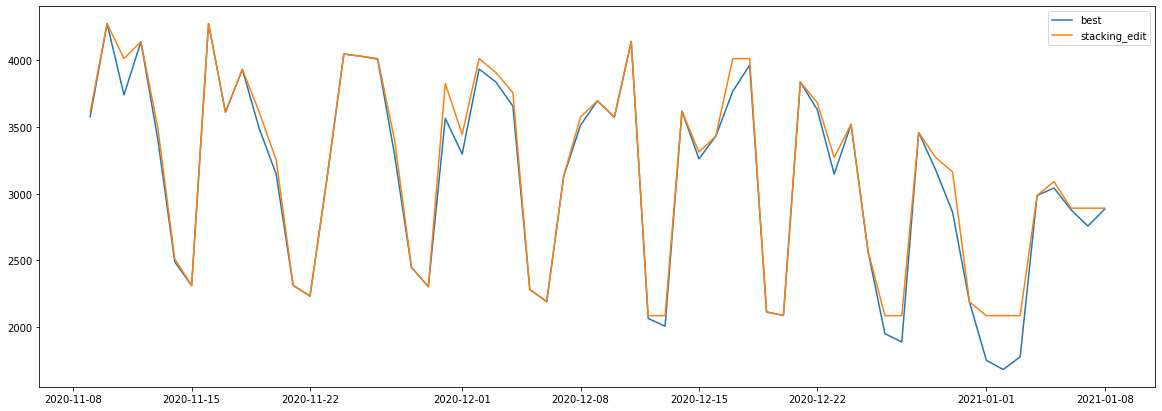

In [ ]:
# plot expected vs preducted


plt.figure(figsize = (20,7))
pyplot.plot(best['사용자'], label='best')
#pyplot.plot(lgbm_st['사용자'], label='lgbm_st')
pyplot.plot(submission['사용자'], label = 'stacking_edit')
#pyplot.tick_params(axis='x', direction='in',  top=True)

#pyplot.xticks(np.arange(0, 5))
pyplot.legend()
pyplot.show()

In [ ]:
# best['사용자']['2020-11-20':]

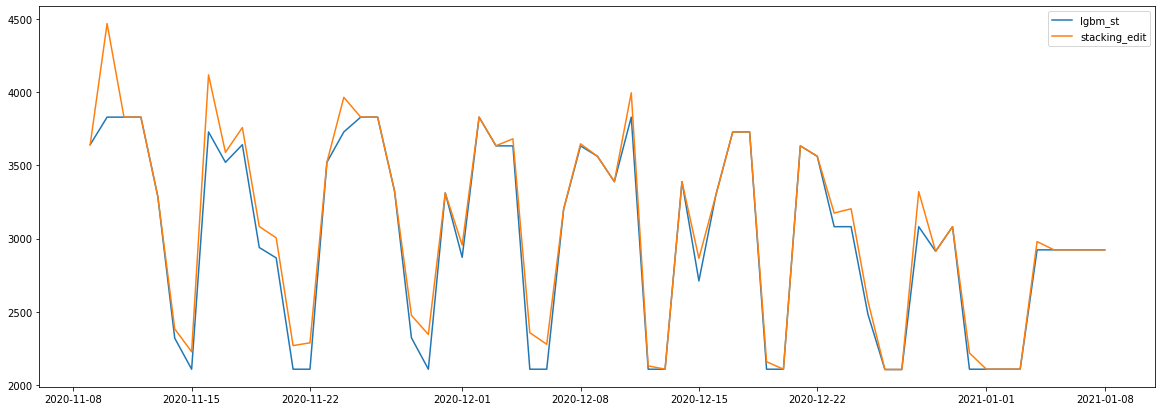

In [ ]:

plt.figure(figsize = (20,7))
#pyplot.plot(best['세션'], label='best')
pyplot.plot(lgbm_st['세션'], label='lgbm_st')
pyplot.plot(stacking_edit['세션'], label = 'stacking_edit')
pyplot.legend()
pyplot.show()

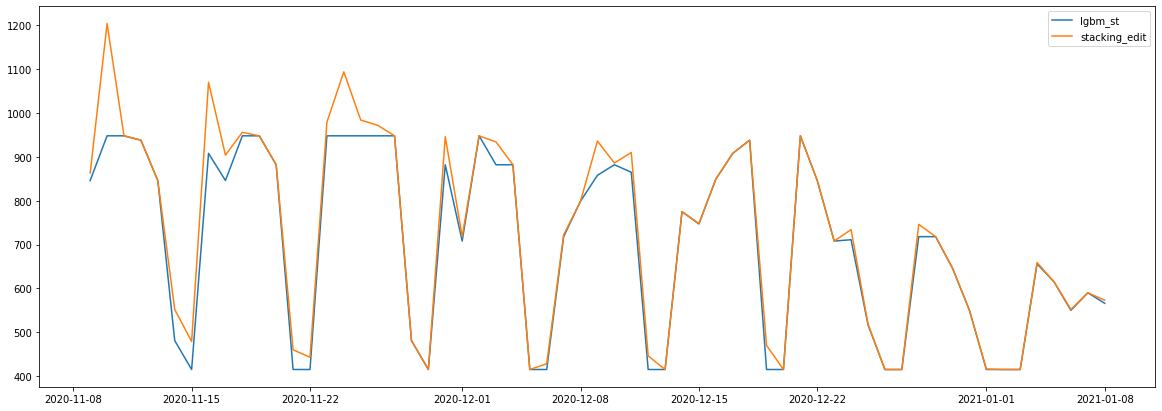

In [ ]:

plt.figure(figsize = (20,7))
#pyplot.plot(best['신규방문자'], label='best')
pyplot.plot(lgbm_st['신규방문자'], label='lgbm_st')
pyplot.plot(stacking_edit['신규방문자'], label = 'stacking_edit')
pyplot.legend()
pyplot.show()

In [ ]:

plt.figure(figsize = (20,7))
# pyplot.plot(best['페이지뷰'], label='best')
pyplot.plot(lgbm_st['페이지뷰'], label='lgbm_st')
pyplot.plot(submission['페이지뷰'], label = 'stacking_edit')
pyplot.legend()
pyplot.show()

ValueError: ignored

- 

In [ ]:
stacking_edit = submission.copy()
stacking_edit.head()

,사용자,세션,신규방문자,페이지뷰
DateTime,,,,
2020-11-09,3609,3640,846,93222
2020-11-10,3824,3828,948,99463
2020-11-11,4010,3828,948,99463
2020-11-12,4010,3828,938,99463
2020-11-13,3493,3287,846,83573


In [ ]:
# 스태킹값이 best보다 낮으면, best값으로 대체


for i in range(len(stacking_edit)):
  if user_lgbm_pred[i] < best['사용자'][i]:
    stacking_edit['사용자'][i] = best['사용자'][i]

  if session_lgbm_pred[i] < best['세션'][i]:
    stacking_edit['세션'][i] = best['세션'][i]

  if new_lgbm_pred[i] < best['신규방문자'][i]:
    stacking_edit['신규방문자'][i] = best['신규방문자'][i]

  if page_lgbm_pred[i] < best['페이지뷰'][i]:
    stacking_edit['페이지뷰'][i] = best['페이지뷰'][i]


stacking_edit.head()

,사용자,세션,신규방문자,페이지뷰
DateTime,,,,
2020-11-09,3609,3640,863,93222
2020-11-10,4272,4466,1204,117366
2020-11-11,4010,3828,948,99463
2020-11-12,4136,3828,938,115696
2020-11-13,3493,3287,846,84806


In [ ]:
path3 = '/content/drive/MyDrive/Colab Notebooks/DACON CUP'

submission =  pd.read_csv(path3 + '/open_data/submission.csv', encoding = 'euc-kr')
submission.head()

,DateTime,사용자,세션,신규방문자,페이지뷰
0,2020-11-09,0,0,0,0
1,2020-11-10,0,0,0,0
2,2020-11-11,0,0,0,0
3,2020-11-12,0,0,0,0
4,2020-11-13,0,0,0,0


In [ ]:

for i in range(len(submission)):
  submission['사용자'][i] =  stacking_edit['사용자'][i]
  submission['세션'][i] =  stacking_edit['세션'][i]
  submission['신규방문자'][i] =  stacking_edit['신규방문자'][i]
  submission['페이지뷰'][i] =  stacking_edit['페이지뷰'][i]

submission.to_csv('lgbm stacking_edit.csv', index = False, encoding = 'euc-kr')



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [ ]:
submission.head()

,DateTime,사용자,세션,신규방문자,페이지뷰
0,2020-11-09,3609,3640,863,93222
1,2020-11-10,4272,4466,1204,117366
2,2020-11-11,4010,3828,948,99463
3,2020-11-12,4136,3828,938,115696
4,2020-11-13,3493,3287,846,84806


#### 결과 비교

In [ ]:
# plot expected vs preducted


plt.figure(figsize = (20,7))
pyplot.plot(best['사용자'], label='best')
pyplot.plot(mean_sub['사용자'], label = 'stacking')
pyplot.plot(worst['사용자'], label='worst')
pyplot.legend()
pyplot.show()


# 21.1.8 을 잘 예측한다 싶으면 21.1.1을 너무 높게 예측함

ValueError: ignored

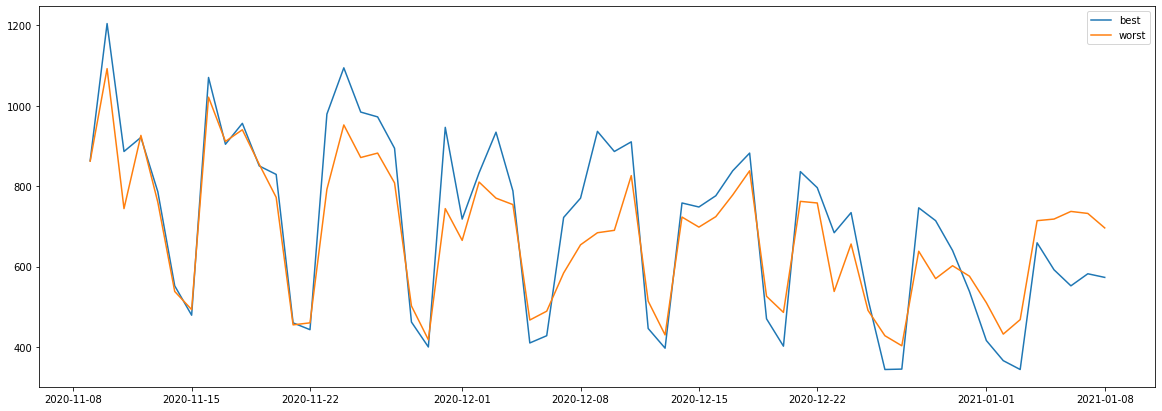

In [ ]:
plt.figure(figsize = (20,7))
pyplot.plot(best['신규방문자'], label='best')
#pyplot.plot(mean_sub['신규방문자'], label = 'stacking')
pyplot.plot(worst['신규방문자'], label='worst')
pyplot.legend()
pyplot.show()

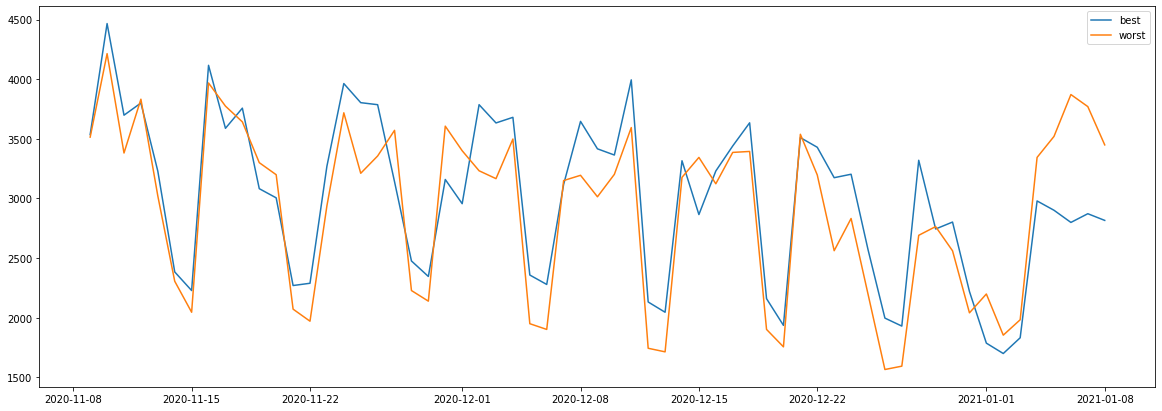

In [ ]:

plt.figure(figsize = (20,7))
pyplot.plot(best['세션'], label='best')
#pyplot.plot(mean_sub['세션'], label = 'stacking')
pyplot.plot(worst['세션'], label='worst')
pyplot.legend()
pyplot.show()

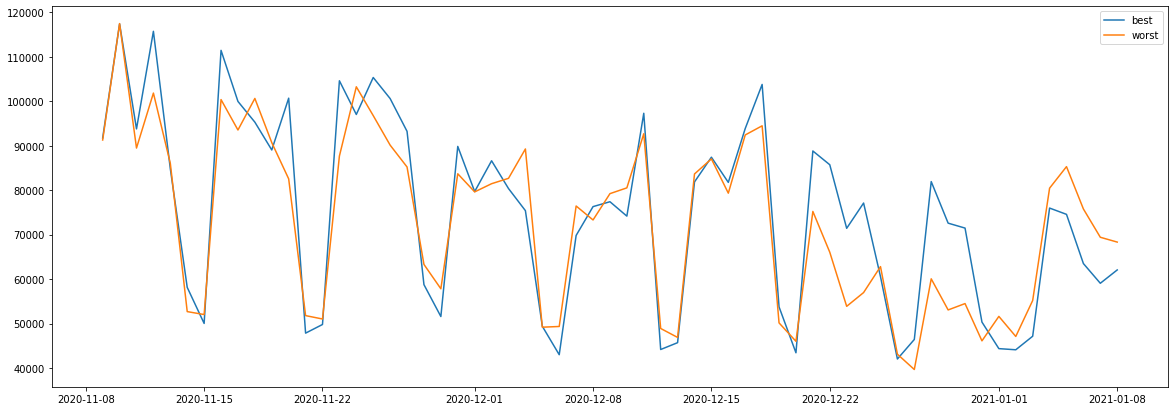

In [ ]:

plt.figure(figsize = (20,7))
pyplot.plot(best['페이지뷰'], label='best')
#pyplot.plot(mean_sub['페이지뷰'], label = 'stacking')
pyplot.plot(worst['페이지뷰'], label='worst')
pyplot.legend()
pyplot.show()

In [ ]:
best.head()

,사용자,세션,신규방문자,페이지뷰
DateTime,,,,
2020-11-09,3544,3514,862,91260
2020-11-10,4455,4214,1092,117435
2020-11-11,3804,3381,744,89449
2020-11-12,4189,3832,926,101809
2020-11-13,3326,3021,760,86012


In [ ]:
best['신규방문자'] = mean_sub['신규방문자']
best.head()

,사용자,세션,신규방문자,페이지뷰
DateTime,,,,
2020-11-09,3544,3514,984,91260
2020-11-10,4455,4214,1092,117435
2020-11-11,3804,3381,874,89449
2020-11-12,4189,3832,1003,101809
2020-11-13,3326,3021,842,86012


In [ ]:
best.to_csv('best+19.05(신규방문자).csv', encoding = 'euc_kr',index=True)